------------------
# Indexovanie
-------------------------

In [1]:
import csv
import re
import hashlib

from nltk.tokenize import TweetTokenizer
from string import ascii_lowercase

In [37]:
tokenizer = TweetTokenizer()

hashtags = []
tags = []
tweets = []

with open('HateTweets.csv', 'r', encoding="utf8") as original:
    readCSV = csv.reader(original, delimiter=',')
    
    for x in readCSV:
        hashedTweet = hashlib.md5(x[1].encode()) 
        tokens = tokenizer.tokenize(x[1])
        
        for token in tokens:
            if(token[0] == '#'):
                row = []
                row.append(hashedTweet.hexdigest())
                row.append(token.lower())
                
                hashtags.append(row)
                
            elif (token[0] == '@'):
                row = []
                row.append(hashedTweet.hexdigest())
                row.append(token.lower())
                
                tags.append(row)
            
        row = []
        row.append(hashedTweet.hexdigest())
        row.append(x[1])
            
        tweets.append(row)


In [38]:
def findTweet(x):
    for i in tweets:
        if(i[0] == x): return i[1]

In [49]:
def search(userInput):
    
    userInput = userInput.lower()
    
    if(userInput[0] == '#'):
        for i in hashtags:
            if(i[1] == userInput):
                print("[Tweet]: " + findTweet(i[0]))
    elif(userInput[0] == '@'):
        for i in tags:
            if(i[1] == userInput):
                print("[Tweet]: " + findTweet(i[0]))

In [50]:
search("@realDonaldTrump")

[Tweet]: You know what I can’t wait for? The trump supporters to have kids... those kids grow up and in school they learn how @realDonaldTrump was one of thee worst Presidents in the US. They then come home to tell their stupid parents who still are rocking the MAGA hat how dumb they are
[Tweet]: @realDonaldTrump @BreitbartNews Shut up and get the hell out of our house. We're sick to death of your lies and inability to act like an adult with a brain.
[Tweet]: @Jason_n_Nascar @OldIsthmian @realDonaldTrump What you are describing is called a frivolous lawsuit. You don’t burn court hours and people’s time while you look for proof of what you claim. You show up with evidence or you get the fuck out. Uneducated idiots are all he’s got left apparently
[Tweet]: @ClemencyForRoss @realDonaldTrump @RealRossU Monster like you deserves the DP tbh.  Your parents are dumb af also.
[Tweet]: @realDonaldTrump You’re going on your third week of crying. Shut the fuck up already, you stupid fucking child.

--------------------
# Frekvenčná analýza
--------------

In [15]:
import csv
import emoji
import re

import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

from string import ascii_lowercase
from collections import Counter

In [16]:
def isAlpha(str):
    regex = "^(?=.*[a-zA-Z])[A-Za-z]+$"
    p = re.compile(regex)
    
    if(str == None):
        return False

    if(re.search(p, str)):
        return True
    else:
        return False

In [17]:
def clean(word):
    word = re.sub(r'^#', '', word)
    
    try:
        if(word[0] == '@' or not isAlpha(word)): 
            return False
    except:
        return False

    return word.lower()

In [18]:
def char_is_emoji(character):
    return character in emoji.UNICODE_EMOJI

In [29]:
tokenizer = TweetTokenizer()

tokenList = []
emojiList = []

stop_words = set(stopwords.words('english'))
extended_stops = {"ya", "yo", "yu", "da", "em", "im", "theres", "dat", "dats", "aint", "thats", "doe", "ur"}

with open('HateTweets.csv', 'r', encoding="utf8") as original:
    readCSV = csv.reader(original, delimiter=',')
    
    for x in readCSV:
        tokens = tokenizer.tokenize(x[1])

        for token in tokens:
            if(char_is_emoji(token)):
                emojiList.append(token)
            else:
                if(clean(token)):
                    token = clean(token)
                    if(token not in stop_words and token not in extended_stops and len(token) > 2):
                        tokenList.append(token)
    

In [24]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('S'):
        return wordnet.ADJ_SAT
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [25]:
tokenListLemma = []
lemmatizer = WordNetLemmatizer()

for word in tokenList:
    word = lemmatizer.lemmatize(word, get_wordnet_pos(word))
    tokenListLemma.append(word)

In [30]:
emojiFrequency = {}
emojiFrequency = dict(Counter(emojiList))
emojiFrequency = dict(sorted(emojiFrequency.items(), key=lambda item: item[1], reverse = True))
print(emojiFrequency)

print()

wordFrequency = {}
wordFrequency = dict(Counter(tokenListLemma))
wordFrequency = dict(sorted(wordFrequency.items(), key=lambda item: item[1], reverse = True))

wordFrequency_items = wordFrequency.items()
firstN_items = list(wordFrequency_items)[:60]

print(firstN_items)

{'😂': 49, '😭': 40, '🤣': 20, '🏻': 16, '👇': 13, '🏾': 10, '‼': 9, '🤦': 7, '😎': 7, '🥰': 7, '♀': 6, '🙏': 6, '💀': 6, '😡': 6, '♂': 5, '😤': 5, '🙄': 5, '💖': 5, '😩': 4, '🤷': 4, '🥺': 4, '✨': 4, '🥵': 4, '🤬': 4, '🙈': 3, '💯': 3, '😒': 3, '❣': 3, '😪': 3, '🇺': 3, '🇸': 3, '🇬': 2, '🇧': 2, '💩': 2, '💪': 2, '🏽': 2, '🥴': 2, '👌': 2, '😱': 2, '😆': 2, '\U0001f9cd': 1, '🍾': 1, '😅': 1, '😈': 1, '😑': 1, '😠': 1, '✅': 1, '😉': 1, '✌': 1, '😢': 1, '💁': 1, '🤪': 1, '😕': 1, '🗣': 1, '😏': 1, '🌕': 1, '🌞': 1, '🤴': 1, '⏰': 1, '💔': 1, '🤯': 1, '🍆': 1, '💕': 1, '😁': 1, '☑': 1, '😐': 1, '🏿': 1, '🤝': 1, '🦍': 1, '🤞': 1, '☪': 1, '🎬': 1, '🎥': 1, '🏴': 1, '🙃': 1, '🤡': 1, '💜': 1, '😘': 1, '👋': 1, '🖕': 1, '🏼': 1, '😟': 1, '🔒': 1, '\U0001f971': 1, '😣': 1}

[('fuck', 355), ('people', 114), ('get', 80), ('kill', 79), ('like', 66), ('dumb', 63), ('stupid', 62), ('think', 61), ('say', 50), ('want', 50), ('death', 47), ('make', 46), ('nigga', 42), ('one', 39), ('time', 37), ('would', 37), ('bitch', 36), ('know', 35), ('as', 32), ('shit', 31), ('take'

In [31]:
from wordcloud import WordCloud 
from PIL import Image
import matplotlib.pyplot as plt

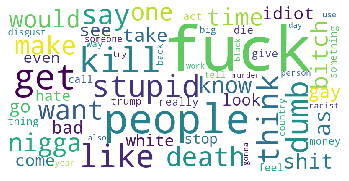

In [32]:
wc = WordCloud(background_color="white",width=800,height=400, max_words=60,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(wordFrequency)
plt.axis("off")
plt.imshow(wc)